In [49]:
%config InlineBackend.figure_format = 'svg'
import ipywidgets as widgets
from IPython.display import display 
import matplotlib.pyplot as plt
from scipy.special import erf
from mpmath import e1 as W
import numpy as np

# dimensionless pressure 1D, 2D, 3D
p1 = lambda r, t: 4*(np.pi*t)**0.5*np.exp(-r**2/t) - 4*np.pi*r*(1-erf(r/t**.5))
p2 = lambda r, t: float(W(r**2/t))
p3 = lambda r, t: 1/r * (1 - erf(r/t**0.5))

# dimensionless pressure after injection being cut at characteristic time 
p1T = lambda r, t: p1(r,t)-p1(r,t-1)
p2T = lambda r, t: p2(r,t) - p2(r,t-1)
p3T = lambda r, t: p3(r,t) - p3(r,t-1)

# backfront
rbf1 = lambda t: (0.5*t*(t-1) * np.log(t/(t-1)))**0.5
rbf2 = lambda t: (t*(t-1) * np.log(t/(t-1)))**0.5
rbf3 = lambda t: (1.5*t*(t-1) * np.log(t/(t-1)))**0.5

# maximum pressure p(r) from backfront
pmax1 = lambda r: 4*(np.pi)**0.5*((1+2*r**2)**0.5*np.exp(-r**2/(1+2*r**2)) - 2**0.5*r*np.exp(-0.5) - np.pi**0.5*r*(1-erf(r/(1+2*r**2)**0.5)-(1-erf(1/2**0.5))))
pmax2 = lambda r: float(W(1/(1+1/r**2))) - float(W(1))
pmax3 = lambda r: 1/r*(1-erf(r/(1+2*r**2/3)**0.5) - (1-erf(1.5**0.5)))

In [ ]:
# COSNTANT RADIAL PRESSURE DIFFUSION
def plot_pr(t):
    r1 = np.linspace(0,10,500)
    p1d = p1(r1,t)
    
    r2 = np.linspace(0.001,10,500)
    p2d = np.array([p2(ri,t) for ri in r2])
    
    r3 = np.linspace(0.001,10,500)
    p3d = p3(r3,t)
    
    f, ax = plt.subplots(1, figsize = (6,4))
    ax.plot(r1, p1d, label='1D')
    ax.plot(r2, p2d, label='2D')
    ax.plot(r3, p3d, label='3D')
    plt.xlim([0,8])
    plt.ylim([0,20])
    ax.set_title('pressure diffusion in 1D,2D,3D')
    ax.set_xlabel('r')
    ax.set_ylabel('p')
    plt.legend()
    plt.show()

time = widgets.FloatSlider(value = 0.001, min = 0.001, max = 1.1, step = 0.1)

plot_pr = widgets.interactive(plot_pr, t = time)

display(plot_pr)


In [43]:
# RADIAL PRESSURE DIFFUSION AFTER INJECTION FOR TIME T
def plot_pr_injT(t):
    r1 = np.linspace(0,10,500)
    p1 = p1T(r1,t)
    
    r2 = np.linspace(0,10,500)
    p2 = np.array([p2T(ri,t) for ri in r2])
    
    r3 = np.linspace(0.001,10,500)
    p3 = p3T(r3,t)
    
    f, ax = plt.subplots(1, figsize = (6,4))
    ax.plot(r1, p1, label='1D')
    ax.plot(r2, p2, label='2D')
    ax.plot(r3, p3, label='3D')
    plt.xlim([0,8])
    plt.ylim([0,20])
    ax.set_title('pressure diffusion in 1D,2D,3D after injection of time T')
    ax.set_xlabel('r')
    ax.set_ylabel('p')
    plt.legend()
    plt.show()

time = widgets.FloatSlider(value = 1, min = 1.001, max = 10, step = 0.1)

plot_pr = widgets.interactive(plot_pr_injT, t = time)

display(plot_pr)

In [51]:
# RADIAL PRESSURE DIFFUSION - INJECTION FOR TIME T FOLLOWED BY ABRUPT STOP
def plot_injectioncut(t):
    n = 1000
    if t <= 1:
        r1 = np.linspace(0,10,n)
        p1d = p1(r1,t)

        r2 = np.linspace(0.001,10,n)
        p2d = np.array([p2(ri,t) for ri in r2])

        r3 = np.linspace(0.001,10,n)
        p3d = p3(r3,t)

        f, ax = plt.subplots(1, figsize = (6,4))
        ax.plot(r1, p1d, label='1D')
        ax.plot(r2, p2d, label='2D')
        ax.plot(r3, p3d, label='3D')

    else:
        r1 = np.linspace(0,10,n)
        p1d = p1T(r1,t)

        r2 = np.linspace(0,10,n)
        p2d = np.array([p2T(ri,t) for ri in r2])

        r3 = np.linspace(0.001,10,n)
        p3d = p3T(r3,t)

        f, ax = plt.subplots(1, figsize = (6,4))
        ax.plot(r1, p1d, label='1D')
        ax.plot(r2, p2d, label='2D')
        ax.plot(r3, p3d, label='3D')
        
    plt.xlim([0,2])
    plt.ylim([0,12])
    ax.set_title('pressure diffusion (injection cut at time 1)')
    ax.set_xlabel('r')
    ax.set_ylabel('p')
    plt.legend()
    plt.show()

time = widgets.FloatSlider(value = 1e-3, min = 1e-3, max = 3, step = 1e-2)

plot_pr_inj = widgets.interactive(plot_injectioncut, t = time)

display(plot_pr_inj)

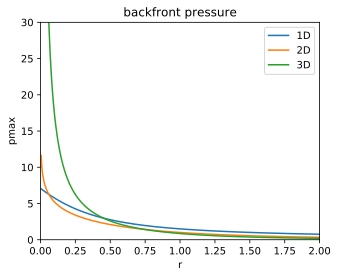

In [53]:
n = 500
r0 = 1e-3
r1 = 2
r = np.linspace(r0,r1,n)
pmax1d = pmax1(r)
# pmax2d = np.array([pmax2(ri) for ri in r])
# pmax3d = pmax3(r)

f, ax = plt.subplots(1,figsize=(5,4))
ax.plot(r,pmax1d, label='1D')
ax.plot(r,pmax2d, label='2D')
ax.plot(r,pmax3d, label='3D')
ax.set_ylim(0,30)
ax.set_xlim(r0,r1)
ax.legend()
ax.set_xlabel('r')
ax.set_ylabel('pmax')
ax.set_title('backfront pressure')

plt.show()